In [20]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [30]:
# numpy의 구조로 변환
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
)

perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [22]:
perch_length=[8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]

df = pd.DataFrame([perch_length,perch_weight])
df = df.T
df

,0,1
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


Text(0, 0.5, '무게')

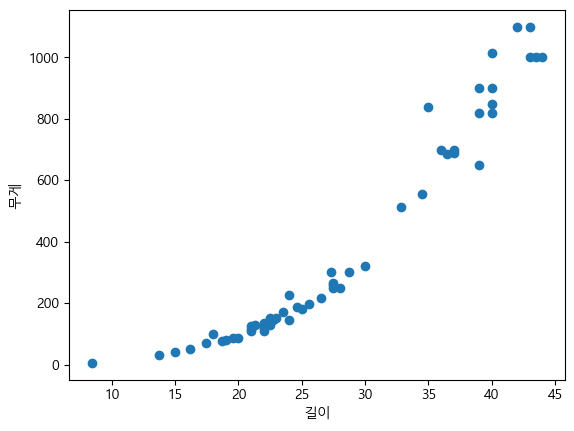

In [31]:
# 산점도로 출력하시오.
# x축은 길이 df[0], y축은 무게 df[1]
# plt.scatter(df[0],df[1])
plt.scatter(perch_length,perch_weight)
plt.xlabel('길이')
plt.ylabel("무게")


머신러닝 구현
1. 데이터 전처리 - Nan,0,단위처리, 훈련세트,테스트세트 분리
2. 데이터 학습시키기
3. 데이터 예측하기
4. 예측값 구하기

In [32]:
# 머신러닝 구현
# 1. 데이터 전처리 - Nan,0,단위처리, 훈련세트,테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight
)
train_input

array([43. , 19.6, 27.5, 24. , 21. , 23. , 22. , 44. , 24. , 40. , 27.3,
       35. , 26.5, 18. , 21. , 39. , 39. , 18.7, 25. , 21. , 13.7, 40. ,
       15. , 25.6, 22.5, 34.5, 23.5, 42. , 37. , 16.2, 22. , 32.8, 21.3,
       36.5, 22. , 43. , 27.5, 22.5, 40. , 19. , 40. , 20. ])

In [33]:
train_input

array([43. , 19.6, 27.5, 24. , 21. , 23. , 22. , 44. , 24. , 40. , 27.3,
       35. , 26.5, 18. , 21. , 39. , 39. , 18.7, 25. , 21. , 13.7, 40. ,
       15. , 25.6, 22.5, 34.5, 23.5, 42. , 37. , 16.2, 22. , 32.8, 21.3,
       36.5, 22. , 43. , 27.5, 22.5, 40. , 19. , 40. , 20. ])

In [26]:
# 총개수 : 56
train_input.shape   # 42
# test_input.shape  # 14

(42,)

In [36]:
# 알고리즘 구현을 위한 2차원 행렬로 변경.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [39]:
train_input.shape
test_input.shape

(14, 1)

In [43]:
# 데이터 학습시키기
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [47]:
# 데이터 예측하기
# 예측의 오차 범위 - 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게 예측
print("예측값 : ",predict)

예측값 :  [ 183.4  245.    78.9  131.   245.   139.   131.   824.   686.2  245.
  308.4 1020.    60.3  755. ]


In [52]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,   78. ,   80. ,   85. ,
         85. ,  100. ,  110. ,  110. ,  115. ,  120. ,  120. ,  125. ,
        130. ,  130. ,  130. ,  135. ,  145. ,  145. ,  150. ,  150. ,
        170. ,  180. ,  188. ,  197. ,  218. ,  225. ,  250. ,  250. ,
        260. ,  265. ,  300. ,  300. ,  320. ,  514. ,  556. ,  650. ,
        685. ,  690. ,  700. ,  700. ,  820. ,  820. ,  840. ,  850. ,
        900. ,  900. , 1000. , 1000. , 1000. , 1015. , 1100. , 1100. ])

In [49]:
# 예측한 값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print("오차범위 : ",test_mean)

오차범위 :  20.735714285714284


In [48]:
# 예측률 측정하기
score = knr.score(test_input,test_target)
print("예측률 : ",score)

예측률 :  0.9907623260907633


knn 회귀 분석을 통해 농어에 대한 무게를 예측하는 프로그램을 구현

예측값 :  [ 183.4  245.    78.9  131.   245.   139.   131.   824.   686.2  245.
  308.4 1020.    60.3  755. ]
